# Statistics Project - Assignment 3

Gur Keinan, 213635899

Naomi Derel, 325324994

## Data & Transformations (previous assignments)

We picked the "Cardiovascular Diseases Risk Prediction Dataset".

https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset?resource=download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(1012)

data = pd.read_csv('CVD_cleaned.csv')

# transformation 1:
data.loc[data["Diabetes"] ==
         'No, pre-diabetes or borderline diabetes', "Diabetes"] = 'at risk'
data = data[data["Diabetes"] != 'Yes, but female told only during pregnancy']

# transformation 2:
data["Numerical_Age_Category"] = data["Age_Category"].apply(
    lambda x: int(x[:2]))


## Part A - Linear Regression

### 1.

Do changes in exercise (binary), sex (binary), green vegetables consumption (ordinal), and height (continuous), influence weight?

### 2.

In [2]:
small_data = data[['Exercise', 'Sex',
                   'Green_Vegetables_Consumption', 'Height_(cm)', 'Weight_(kg)']]
sample = small_data.sample(200)
sample.head()

,Exercise,Sex,Green_Vegetables_Consumption,Height_(cm),Weight_(kg)
102725,Yes,Female,60.0,168.0,72.57
195809,No,Female,4.0,155.0,59.87
65238,Yes,Male,12.0,180.0,65.77
167460,Yes,Female,16.0,155.0,62.14
295267,Yes,Female,16.0,157.0,59.87


### 3.

We will answer each sub-part for each variable separately.

#### **Exercise:** (binary)

#a:

In [3]:
exercise_res = sample.groupby('Exercise').count()['Weight_(kg)']
exercise_res['Total'] = exercise_res.sum()
print(exercise_res)


Exercise
No        36
Yes      164
Total    200
Name: Weight_(kg), dtype: int64


#b:

* We can see there are no missing values in the exercise column (a total of 200). 
* Since the values are binary, there are no outliers.
* The labels are not balanced.
* Since the values are binary, if independent from the data they are distributed bernoulli. From our knowledge of the domain we cannot assume they are independent from the data.

#d:

Text(0, 0.5, 'Population Count')

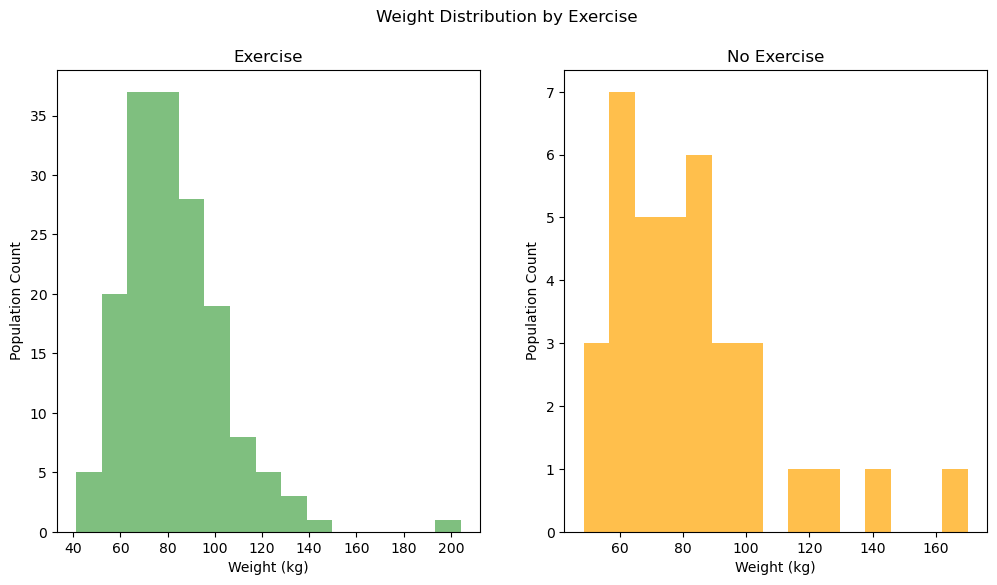

In [4]:
# divide the sample into two groups:
sample_exercise = sample[sample['Exercise'] == 'Yes']
sample_no_exercise = sample[sample['Exercise'] == 'No']

# plot a histogram of the weight distribution for each group:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Weight Distribution by Exercise')

axes[0].hist(sample_exercise['Weight_(kg)'], alpha=0.5,
             label='Exercise', color='green', bins=15)
axes[0].set_title('Exercise')
axes[0].set_xlabel('Weight (kg)')
axes[0].set_ylabel('Population Count')

axes[1].hist(sample_no_exercise['Weight_(kg)'], alpha=0.7,
             label='No Exercise', color='orange', bins=15)
axes[1].set_title('No Exercise')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Population Count')

The exercise data has more values in lower weight ranges than the no-exercise data.

#### **Sex:** (binary)

a:

In [5]:
sex_res = sample.groupby('Sex').count()['Weight_(kg)']
sex_res['Total'] = sex_res.sum()
print(sex_res)


Sex
Female    102
Male       98
Total     200
Name: Weight_(kg), dtype: int64


#b:

* We can see there are no missing values in the sex column (a total of 200). 
* Since the values are binary, there are no outliers.
* The labels are balanced.
* Since the values are binary, if independent from the data they are distributed bernoulli. From our knowledge of the domain, we can assume they are.

#d:

Text(0, 0.5, 'Population Count')

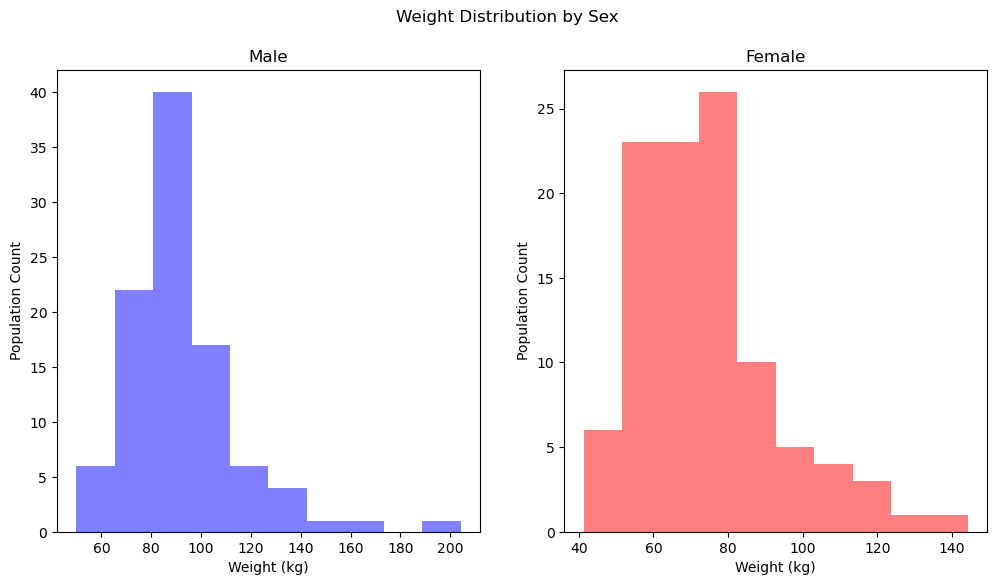

In [6]:
# divide the sample into two groups:
sample_male = sample[sample['Sex'] == 'Male']
sample_female = sample[sample['Sex'] == 'Female']

# plot a histogram of the weight distribution for each group:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Weight Distribution by Sex')

axes[0].hist(sample_male['Weight_(kg)'], alpha=0.5,
             label='Male', color='blue', bins=10)
axes[0].set_title('Male')
axes[0].set_xlabel('Weight (kg)')
axes[0].set_ylabel('Population Count')

axes[1].hist(sample_female['Weight_(kg)'], alpha=0.5,
             label='Female', color='red', bins=10)
axes[1].set_title('Female')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Population Count')

The distributions are different, and there are more values in the 'female' category below 80, than in the 'male' category. 

#### **Green vegetables consumption:** (ordinal)

#a:

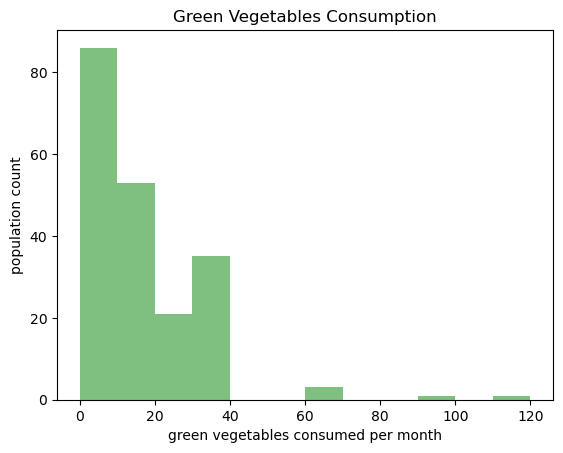

In [7]:
# plot a histogram for green vegetables consumption per month:
plt.hist(sample['Green_Vegetables_Consumption'],
         bins=12, color='green', alpha=0.5)
plt.title('Green Vegetables Consumption')
plt.ylabel('population count')
plt.xlabel('green vegetables consumed per month')
plt.show()

#b:

In [8]:
# find missing values:
print("values: ", sample['Green_Vegetables_Consumption'].count())

# find outliers:
q1 = sample['Green_Vegetables_Consumption'].quantile(0.25)
q3 = sample['Green_Vegetables_Consumption'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print("total number of outliers: ", len(sample[(sample['Green_Vegetables_Consumption'] < lower_bound) | (
    sample['Green_Vegetables_Consumption'] > upper_bound)]))

values:  200
total number of outliers:  5


* We can see there are no missing values (a total of 200). 
* There are 5 outliers in the sample.
* The distribution is not symmetrical.
* Doesn't appear as a known distribution.

#c:

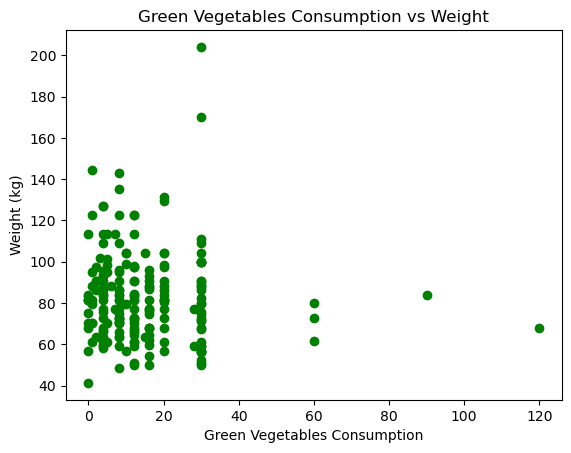

In [9]:
# plot weight as a function of green vegetables consumption:
plt.plot(sample['Green_Vegetables_Consumption'],
         sample['Weight_(kg)'], 'o', color='green')
plt.title('Green Vegetables Consumption vs Weight')
plt.ylabel('Weight (kg)')
plt.xlabel('Green Vegetables Consumption')
plt.show()

There isn't an appearance of connection between the values in the plot. We can notice the main mass of points is on the lower end of green vegetables consumption. We can also see that the outlier have a high value of either one of the parameters, but not both.

#### **Height:** (continuous)

#a:

Text(0.5, 0, 'height in cm')

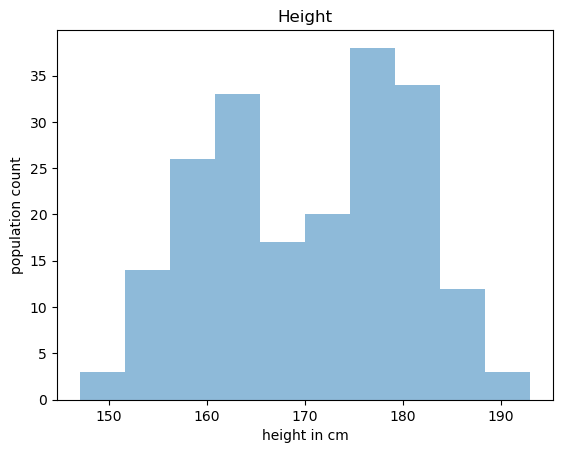

In [10]:
# plot a histogram for height:
plt.hist(sample['Height_(cm)'], bins=10, alpha=0.5)
plt.title('Height')
plt.ylabel('population count')
plt.xlabel('height in cm')


#b:

In [11]:
print("values: ", sample['Height_(cm)'].count())

q1 = sample['Height_(cm)'].quantile(0.25)
q3 = sample['Height_(cm)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print("total number of outliers: ", len(
    sample[(sample['Height_(cm)'] < lower_bound) | (sample['Height_(cm)'] > upper_bound)]))

values:  200
total number of outliers:  0


* We can see there are no missing values (a total of 200). 
* There are 2 outliers in the sample.
* The distribution is symmetrical.
* The distribution appears to be bi-normal from the histogram (we know this is plausible from our knowledge of the domain).

#c:

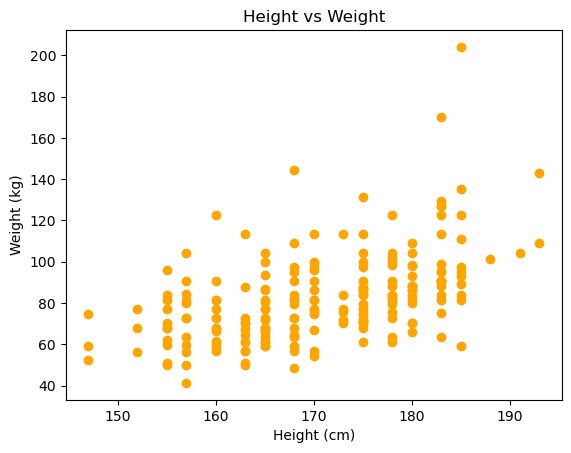

In [12]:
plt.plot(sample['Height_(cm)'], sample['Weight_(kg)'], 'o', color='orange')
plt.title('Height vs Weight')
plt.ylabel('Weight (kg)')
plt.xlabel('Height (cm)')
plt.show()


We can see there appears to be a connection between the values in the plot. Weight values are generally higher for higher height values.

The weight parameter seems to have more influence on the height parameter than the green vegetables consumption parameter.

### 4.

In [13]:
n = len(sample)

# Transform categorical variables to numeric:
sample_sex_values = sample['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
sample_exercise_values = sample['Exercise'].apply(
    lambda x: 1 if x == 'Yes' else 0)

In [14]:
# Create X matrix with a column of ones, and parameters:
x1 = np.concatenate((np.ones((n, 1)), np.array(
    sample_exercise_values).reshape(-1, 1)), axis=1)
x2 = np.concatenate((x1, np.array(sample_sex_values).reshape(-1, 1)), axis=1)
X = np.concatenate((x2, np.array(sample.iloc[:, 2:4])), axis=1)

print(X[:5])

# Create y vector:
y = np.array(sample.iloc[:, 4]).reshape(-1, 1)
print(y[:5])

[[  1.   1.   0.  60. 168.]
 [  1.   0.   0.   4. 155.]
 [  1.   1.   1.  12. 180.]
 [  1.   1.   0.  16. 155.]
 [  1.   1.   0.  16. 157.]]
[[72.57]
 [59.87]
 [65.77]
 [62.14]
 [59.87]]


In [15]:
# Calculate the estimated coefficients from equation:
beta = np.linalg.inv(X.T @ X) @ X.T @ y

for i in range(len(beta)):
    print(f"beta {i}: {beta[i][0]:.4f}")


beta 0: -119.3859
beta 1: -4.8897
beta 2: -1.8241
beta 3: -0.0004
beta 4: 1.2148


* beta 0 is the intercept.

* beta 1 is the exercise coefficient. It has a big influence on the explained variable.
If the binary value is changed, it has an affect of -4.8897 on the explained variable.

* beta 2 is the sex coefficient. It has some influence on the explained variable.
If the value is changed from female(0) to male(1), the explained variable decreases by 1.8241.

* beta 3 is the green vegetables consumption coefficient. It has a relatively low value.
If the value is increased by 1, the explained variable decreases by 0.0004.

* beta 4 is the height coefficient. It has a big influence on the explained variable since the values of height are larger.
If the value is increased by 1, the explained variable increases by 1.2148.

### 5.

In [16]:
# Re-define all needed variables for the new model:
n = len(sample)
p = len(beta)

result5_df = pd.DataFrame(columns=['Source', 'SS', 'df', 'MS', 'F', 'p-value'])

# Sum of Squares:
ss_reg = np.sum((X @ beta - np.mean(y))**2)
ss_res = np.sum((y - X @ beta)**2)
ss_tot = np.sum((y - np.mean(y))**2)

# MS:
ms_reg = ss_reg / (p-1)
ms_res = ss_res / (n-p)
ms_tot = ss_tot / (n-1)

# F:
F = ms_reg / ms_res
pvalue = 1 - stats.f.cdf(F, p-1, n-p)

# Add the results to the table:
result5_df.loc[0] = ['Regression', ss_reg, p-1, ms_reg, F, pvalue]
result5_df.loc[1] = ['Residual', ss_res, n-p, ms_res, "-", "-"]
result5_df.loc[2] = ['Total', ss_tot, n-1, ms_tot, "-", "-"]

print(result5_df)

       Source            SS   df           MS          F p-value
0  Regression  25373.074497    4  6343.268624  17.280412     0.0
1    Residual  71580.316381  195   367.078546          -       -
2       Total  96953.390878  199   487.202969          -       -


The F statistic is large and the p-value is very small.


In [17]:
R2 = ss_reg / ss_tot
print("R^2:", R2)

R2_adj = 1 - ms_res / ms_tot
print("R^2_adj:", R2_adj)


R^2: 0.261703837968776
R^2_adj: 0.2465593013117382


### 6.

In [18]:
# noise variance unbiased estimator:
var_eps = (1/(n - p)) * np.sum((y - X @ beta)**2)

# C:
C = np.linalg.inv(X.T @ X)

# Z score:
alpha = 0.05
z_score = stats.norm.ppf(1-(alpha/2))

# CI for coefficients:
for i in range(len(beta)):
    print(f"sample beta {i}:")
    se = np.sqrt(C[i][i] * var_eps)
    ci = (beta[i][0] - z_score * se, beta[i][0] + z_score * se)
    print(f"CI: {ci}")


sample beta 0:
CI: (-189.09202159766184, -49.67975742562348)
sample beta 1:
CI: (-12.019042164009107, 2.2396980996552474)
sample beta 2:
CI: (-10.362716682498318, 6.714465160759174)
sample beta 3:
CI: (-0.1851775619469882, 0.18440706685102087)
sample beta 4:
CI: (0.7822425423634143, 1.647276794405414)


In [19]:
# Find "true" beta coefficients using the whole data set:

data_n = len(data)

# Transform categorical variables to numeric:
data_sex_values = data['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
data_exercise_values = data['Exercise'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create X matrix with a column of ones, and parameters:
x1_data = np.concatenate((np.ones((data_n, 1)), np.array(data_exercise_values).reshape(-1, 1)), axis=1)
x2_data = np.concatenate((x1_data, np.array(data_sex_values).reshape(-1, 1)), axis=1)
X_data = np.concatenate((x2_data, np.array(small_data.iloc[:, 2:4])), axis=1)
# print(X_data)

# Create y vector:
y_data = np.array(small_data.iloc[:, 4]).reshape(-1, 1)
# print(y_data)

# Calculate the estimated coefficients from equation:
beta_data = np.linalg.inv(X_data.T @ X_data) @ X_data.T @ y_data

for i in range(len(beta_data)):
    print(f"beta {i}: {beta_data[i][0]:.4f}")

beta 0: -66.3205
beta 1: -6.5972
beta 2: 1.8402
beta 3: -0.0616
beta 4: 0.9087


All the beta coefficients are in their appropriate CI's.

### 7.

We will use a Wald test for each beta, as we saw in tutorial 4. We will perform the following test for each beta:

$H_0: \beta = 0$

$H_1: \beta \ne 0$

$W = \beta_j / {\sigma_\epsilon * (X^TX)^{-1}_{jj}}$

RR: Reject $H_0$ if $|W| > z_{\alpha/2}$

W is the wald statistic, with the s.e. of the beta coefficient in the denominator.


In [20]:
# noise variance unbiased estimator:
var_eps = (1/(n - p)) * np.sum((y - X @ beta)**2)

# C:
C = np.linalg.inv(X.T @ X)

# Z score:
alpha = 0.05
z_score = stats.norm.ppf(1-(alpha/2))

for i in range(len(beta)):
    b = beta[i][0]
    W = b / np.sqrt(var_eps) * C[i][i]
    if np.abs(W) > z_score:
        print(f"beta {i}: reject H0")
    else:
        print(f"beta {i}: maintain H0")


beta 0: reject H0
beta 1: maintain H0
beta 2: maintain H0
beta 3: maintain H0
beta 4: maintain H0


### 8.

In [21]:
# Calculate residuals:
y_pred = X @ beta
e = y - y_pred


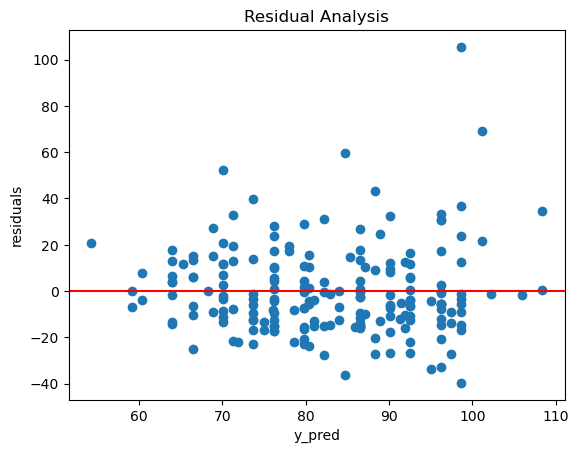

In [22]:
# Residuals plot:
plt.title("Residual Analysis")
plt.scatter(y_pred, e)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("y_pred")
plt.ylabel("residuals")
plt.show()


From this graph we can assume the linearity assumption and the equal variance assumption holds (the residuals are distributed symmetricly and equally).

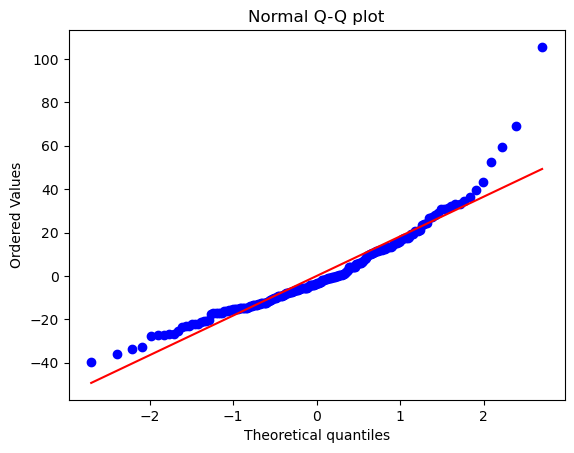

In [23]:
# Normal Q-Q plot:
stats.probplot(e[:, 0], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

From this plot we can assume the normality assumption holds.

### 9.

In [24]:
# get a 1000 new points, not in the sample:
sample_size = 1000
data_without_sample = small_data.drop(sample.index)
new_data = data_without_sample.sample(sample_size)

# Transform categorical variables to numeric:
new_data_sex_values = new_data['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
new_data_exercise_values = new_data['Exercise'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create X matrix with a column of ones, and parameters:
x1_new_data = np.concatenate((np.ones((sample_size, 1)), np.array(new_data_exercise_values).reshape(-1, 1)), axis=1)
x2_new_data = np.concatenate((x1_new_data, np.array(new_data_sex_values).reshape(-1, 1)), axis=1)
X_new = np.concatenate((x2_new_data, np.array(new_data.iloc[:, 2:4])), axis=1)

# get true values:
y_new = np.array(new_data.iloc[:, 4]).reshape(-1, 1)

In [25]:
# a:
# predict y values:
y_new_pred = X_new @ beta

In [26]:
# b:
# for every new point create a CI:
ci_new_list = []
var_eps = (1/(n - p)) * np.sum((y - X @ beta)**2)
C = np.linalg.inv(X.T @ X)
alpha = 0.05
z_score = stats.norm.ppf(1-(alpha/2))

for x in X_new:
    # formula for CI of y|x from tutorial:
    var_new = var_eps * (x @ C @ x.T + 1)
    ci = (x @ beta - z_score * np.sqrt(var_new), x @ beta + z_score * np.sqrt(var_new))
    ci_new_list.append(ci)

In [27]:
# c:
# calculate the percentage of the true result in their predicted CI's:
count_in_ci = 0
for i in range(len(y_new)):
    if ci_new_list[i][0] <= y_new[i] <= ci_new_list[i][1]:
        count_in_ci += 1

print(f"Percentage of y_new in CI: {count_in_ci / len(y_new) * 100:.2f}%")

Percentage of y_new in CI: 95.40%


The percentage of times the true y value is in the CI is 95.4%, which is close to the expected 95%.

### 10.

In [28]:
# Create X matrix with a column of ones, all singular parameters, and interactions:
x3 = np.concatenate((X, (X[:, 1] * X[:, 2]).reshape(-1, 1)), axis=1)
x4 = np.concatenate((x3, (X[:, 1] * X[:, 3]).reshape(-1, 1)), axis=1)
x5 = np.concatenate((x4, (X[:, 1] * X[:, 4]).reshape(-1, 1)), axis=1)
x6 = np.concatenate((x5, (X[:, 2] * X[:, 3]).reshape(-1, 1)), axis=1)
x7 = np.concatenate((x6, (X[:, 2] * X[:, 4]).reshape(-1, 1)), axis=1)
X_interaction = np.concatenate(
    (x7, (X[:, 3] * X[:, 4]).reshape(-1, 1)), axis=1)

# Calculate the estimated coefficients from equation:
beta_interactions = np.linalg.inv(
    X_interaction.T @ X_interaction) @ X_interaction.T @ y
y_interactions_pred = X_interaction @ beta_interactions

for i in range(len(beta_interactions)):
    print(f"beta {i}: {beta_interactions[i][0]:.4f}")

beta 0: -43.3177
beta 1: 55.0679
beta 2: -163.1709
beta 3: -3.3658
beta 4: 0.7403
beta 5: 1.9637
beta 6: -0.2690
beta 7: -0.3420
beta 8: -0.1134
beta 9: 0.9424
beta 10: 0.0213


This is a new model which includes interactions. We can see the additional beta coefficients are not very large, but might be significant.

##### Method 1: Mallow's Cp

In [29]:
R_reg_train = np.sum((y_pred - y)**2)
R_inter_train = np.sum((y_interactions_pred - y)**2)

mallow_reg = R_reg_train + 2 * len(beta) * var_eps
mallow_inter = R_inter_train + 2 * len(beta_interactions) * var_eps

print(f"Mallow's Cp for regular regression model: {mallow_reg:.4f}")
print(f"Mallow's Cp for interactions model: {mallow_inter:.4f}")


Mallow's Cp for regular regression model: 75251.1018
Mallow's Cp for interactions model: 77033.0405


The regular model has a lower Cp statistic, which is better.

##### Method 2: Leave-one-out cross-validation

In [30]:
U_reg = X @ np.linalg.inv(X.T @ X) @ X.T
U_inter = X_interaction @ np.linalg.inv(X_interaction.T @
                                        X_interaction) @ X_interaction.T

R_cv_reg = 0
for i in range(len(y)):
    R_cv_reg += (((y[i] - y_pred[i]) / (1 - U_reg[i][i])) ** 2)[0]

R_cv_inter = 0
for i in range(len(y)):
    R_cv_inter += (((y[i] - y_interactions_pred[i]) /
                   (1 - U_inter[i][i])) ** 2)[0]


print(f"R_cv for regular regression model: {R_cv_reg:.4f}")
print(f"R_cv for interactions model: {R_cv_inter:.4f}")

R_cv for regular regression model: 75606.6838
R_cv for interactions model: 81882.9679


The regular model has a lower score, which is better.

In both methods the regular model is better.

### Part B - Logistic Regression

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(1012)

data = pd.read_csv('CVD_cleaned.csv')

# transformation 1:
data.loc[data["Diabetes"] ==
         'No, pre-diabetes or borderline diabetes', "Diabetes"] = 'at risk'
data = data[data["Diabetes"] != 'Yes, but female told only during pregnancy']

# transformation 2:
data["Numerical_Age_Category"] = data["Age_Category"].apply(
    lambda x: int(x[:2]))

In [32]:
binary_variables = ["Exercise", "Smoking_History", "Skin_Cancer",
                    "Other_Cancer", "Depression", "Diabetes", "Arthritis"]
numerical_variables = ["Weight_(kg)", "Height_(cm)", "BMI", "FriedPotato_Consumption",
                       "Numerical_Age_Category", "Green_Vegetables_Consumption", "Fruit_Consumption", "Alcohol_Consumption"]

# for every binary variable transform the "No" and "Yes" to 0 and 1
data["Sex"] = data["Sex"].apply(lambda x: 0 if x == "Male" else 1)
data["Heart_Disease"] = data["Heart_Disease"].apply(
    lambda x: 0 if x == "No" else 1)
for variable in binary_variables:
    data[variable] = data[variable].apply(lambda x: 0 if x == "No" else 1)

# create a list of the variables that we will use in the model
variables_list = binary_variables + numerical_variables + ["Sex"]

### 1.
How do exercise (binary), smoking history (binary), body weight (ordinal), and fried potato consumption (ordinal) influence the probability of having heart diseases?

### 2.

In [33]:
sample = data.sample(200)[variables_list + ["Heart_Disease"]]
sample.head()

,Exercise,Smoking_History,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Weight_(kg),Height_(cm),BMI,FriedPotato_Consumption,Numerical_Age_Category,Green_Vegetables_Consumption,Fruit_Consumption,Alcohol_Consumption,Sex,Heart_Disease
102725,1,1,0,0,0,0,1,72.57,168.0,25.82,0.0,65,60.0,60.0,8.0,1,0
195809,0,0,0,0,0,1,0,59.87,155.0,24.94,4.0,18,4.0,28.0,4.0,1,0
65238,1,1,0,0,0,0,0,65.77,180.0,20.22,8.0,25,12.0,90.0,20.0,0,0
167460,1,1,0,1,1,0,0,62.14,155.0,25.89,3.0,55,16.0,20.0,0.0,1,0
295267,1,0,0,0,0,0,0,59.87,157.0,24.14,1.0,80,16.0,60.0,0.0,1,0


### 3.

We already explored the following variables in the regression part: exercise and fried potato consumption. 
We will now explore the smoking history and body weight variables.

smoking history - categorical (binary) variable

In [34]:
# create a table with the counts of each smoking status

smoking_status = sample.groupby("Smoking_History").size()
smoking_status

Smoking_History
0    112
1     88
dtype: int64

There are no missing values in this variable. The labels are approximately balanced.

body weight - ordinal variable

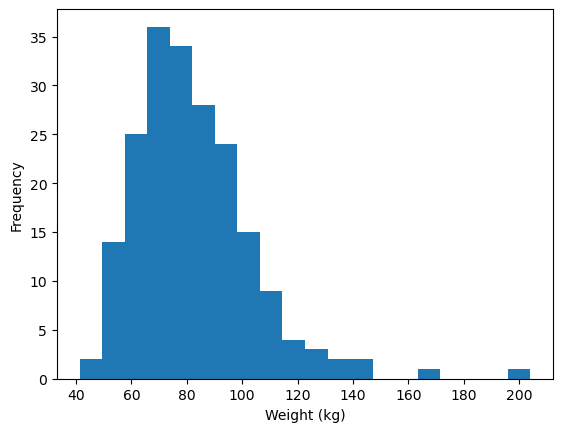

Number of outliers above the high whisker:  6
Number of outliers below the low whisker:  0
Total number of outliers:  6


In [35]:
# create histogran of the body weight

plt.hist(sample["Weight_(kg)"], bins=20)
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.show()

# find outliers in this variable - the observations above the high whisker and below the low whisker
# find the interquartile range
q75, q25 = np.percentile(sample["Weight_(kg)"], [75, 25])
iqr = q75 - q25
# find the upper and lower whiskers
low_whisker = q25 - 1.5 * iqr
high_whisker = q75 + 1.5 * iqr
# find the outliers - separate the above and below outliers
weight_outliers_above = sample[sample["Weight_(kg)"] > high_whisker]
weight_outliers_below = sample[sample["Weight_(kg)"] < low_whisker]
# print the number of outliers
print("Number of outliers above the high whisker: ", len(weight_outliers_above))
print("Number of outliers below the low whisker: ", len(weight_outliers_below))
print("Total number of outliers: ", len(
    weight_outliers_above) + len(weight_outliers_below))

There are no missing values in this variable and 6 outliers. We can see from the histogram that the distribution is not symmetrical and don't resemble a familiar distribution.

We have 2 ordinal (quantitative) variables in the research question. Lets explore the relationship between each one of them and the dependent variable - heart disease.

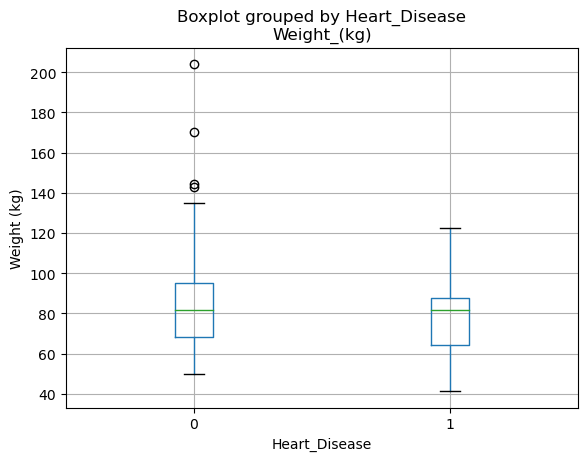

In [36]:
# create a box plot of the body weight in each of the heart disease groups
sample.boxplot(column="Weight_(kg)", by="Heart_Disease")
plt.ylabel("Weight (kg)")
plt.show()

<Axes: title={'center': 'FriedPotato_Consumption'}, xlabel='Heart_Disease'>

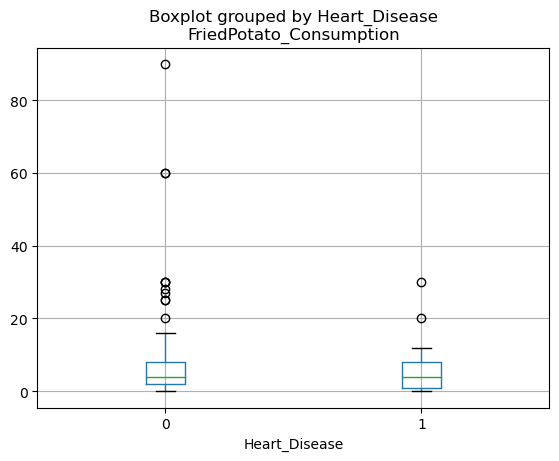

In [37]:
# create a box plot of the fried potato consumption in each of the heart disease groups
sample.boxplot(column="FriedPotato_Consumption", by="Heart_Disease")

We can see a big difference in body weight between the two groups of the heart disease variable. The mean of the body weight is higher in the group with heart disease. We cant see such difference in the fried potato consumption variable. although the mean of the fried potato consumption is higher in the group with heart disease, the difference is not as big as in the body weight variable and in addition the whiskers are very long in the "no disease" group, so we cant know if there is a real difference between the groups.

### 4.

In [38]:
from sklearn.linear_model import LogisticRegression

# create the X and y variables
X = sample[["Weight_(kg)", "FriedPotato_Consumption",
            "Smoking_History", "Exercise"]]
y = sample["Heart_Disease"]

# add to the X variable a column of 1s
X = np.hstack((np.ones((X.shape[0], 1)), X))

logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

coefficients = logistic_regression.coef_
print("the independent coefficient is ", coefficients[0][0])
print("the coefficient of the weight is ", coefficients[0][1])
print("the coefficient of the fried potato consumption is ",
      coefficients[0][2])
print("the coefficient of the smoking history is ", coefficients[0][3])
print("the coefficient of the exercise is ", coefficients[0][4])

the independent coefficient is  -2.8081854064257055e-05
the coefficient of the weight is  -0.012560666811786308
the coefficient of the fried potato consumption is  -0.010259718953532913
the coefficient of the smoking history is  1.1010148436754594
the coefficient of the exercise is  -0.8727756824479214


breakdown of the meaning of each coefficient in the model:
We saw in the tutorial that increasing a variable in one unit in the logistic regression model will increase the log odds by the coefficient of the variable. that said, the following holds:

increase in 1 unit in the weight variable will decrease the log odds by 0.012560666811786308.
increase in 1 unit in the fried potato consumption variable will decrease the log odds by 0.010259718953532913.
increase in 1 unit in the smoking history variable will increase the log odds by 1.1010148436754594.
increase in 1 unit in the exercise variable will decrease the log odds by 0.8727756824479214.

### 5. 

In [39]:
# calculate CI for the coefficients
# first calculate the variance - covariance matrix
estimated_p_list = logistic_regression.predict_proba(X)[:, 1]
v_mat = np.diag([p * (1 - p) for p in estimated_p_list])
var_covar_matrix = np.linalg.inv(X.T @ v_mat @ X)

# now use the formula to calculate the CI
# for the intercept
intercept_ci = [coefficients[0][0] - 1.96 *
                np.sqrt(var_covar_matrix[0][0]), coefficients[0][0] + 1.96 * np.sqrt(var_covar_matrix[0][0])]
print("the CI for the intercept is ", intercept_ci)
# for the weight
weight_ci = [coefficients[0][1] - 1.96 * np.sqrt(var_covar_matrix[1][1]),
             coefficients[0][1] + 1.96 * np.sqrt(var_covar_matrix[1][1])]
print("the CI for the weight is ", weight_ci)
# for the fried potato consumption
fried_potato_ci = [coefficients[0][2] - 1.96 *
                   np.sqrt(var_covar_matrix[2][2]), coefficients[0][2] + 1.96 * np.sqrt(var_covar_matrix[2][2])]
print("the CI for the fried potato consumption is ", fried_potato_ci)
# for the smoking history
smoking_history_ci = [coefficients[0][3] - 1.96 *
                      np.sqrt(var_covar_matrix[3][3]), coefficients[0][3] + 1.96 * np.sqrt(var_covar_matrix[3][3])]
print("the CI for the smoking history is ", smoking_history_ci)
# for the exercise
exercise_ci = [coefficients[0][4] - 1.96 *
               np.sqrt(var_covar_matrix[4][4]), coefficients[0][4] + 1.96 * np.sqrt(var_covar_matrix[4][4])]
print("the CI for the exercise is ", exercise_ci)


the CI for the intercept is  [-2.211003145768179, 2.2109469820600505]
the CI for the weight is  [-0.03702248246072696, 0.011901148837154341]
the CI for the fried potato consumption is  [-0.06125150829466676, 0.04073207038760093]
the CI for the smoking history is  [0.08269617950689367, 2.119333507844025]
the CI for the exercise is  [-1.9414330997018887, 0.19588173480604598]


In [40]:
# calculate the coefficient on the whole data set
# create the X and y variables

X_population = data[[
    "Weight_(kg)", "FriedPotato_Consumption", "Smoking_History", "Exercise"]]
y_population = data["Heart_Disease"]

# add to the X variable a column of 1s
X_population = np.hstack((np.ones((X_population.shape[0], 1)), X_population))

logistic_regression_population = LogisticRegression()
logistic_regression_population.fit(X_population, y_population)

coefficients_population = logistic_regression_population.coef_

print("the independent coefficient is ", coefficients_population[0][0])
print("the coefficient of the weight is ", coefficients_population[0][1])
print("the coefficient of the fried potato consumption is ",
      coefficients_population[0][2])
print("the coefficient of the smoking history is ",
      coefficients_population[0][3])
print("the coefficient of the exercise is ", coefficients_population[0][4])

# check if the population coefficient is in the sample CI
if coefficients_population[0][0] > intercept_ci[0] and coefficients_population[0][0] < intercept_ci[1]:
    print("the population coefficient for the intercept is in the sample CI")

if coefficients_population[0][1] > weight_ci[0] and coefficients_population[0][1] < weight_ci[1]:
    print("the population coefficient for the weight is in the sample CI")

if coefficients_population[0][2] > fried_potato_ci[0] and coefficients_population[0][2] < fried_potato_ci[1]:
    print("the population coefficient for the fried potato consumption is in the sample CI")

if coefficients_population[0][3] > smoking_history_ci[0] and coefficients_population[0][3] < smoking_history_ci[1]:
    print("the population coefficient for the smoking history is in the sample CI")

if coefficients_population[0][4] > exercise_ci[0] and coefficients_population[0][4] < exercise_ci[1]:
    print("the population coefficient for the exercise is in the sample CI")

the independent coefficient is  -1.375564345136877
the coefficient of the weight is  0.005714721248586724
the coefficient of the fried potato consumption is  -0.008898603020086797
the coefficient of the smoking history is  0.7298284648963097
the coefficient of the exercise is  -0.6418906727771281
the population coefficient for the intercept is in the sample CI
the population coefficient for the weight is in the sample CI
the population coefficient for the fried potato consumption is in the sample CI
the population coefficient for the smoking history is in the sample CI
the population coefficient for the exercise is in the sample CI


We can say that every coefficient from the whole population is in the matching CI of the coefficient from the sample. 

### 6.

In [41]:
# add first order interaction terms
# there are 12 possible interaction terms - wei
sample["Weight_Smoking"] = sample["Weight_(kg)"] * sample["Smoking_History"]
sample["Weight_Exercise"] = sample["Weight_(kg)"] * sample["Exercise"]
sample["weight_fried_potato"] = sample["Weight_(kg)"] * \
    sample["FriedPotato_Consumption"]
sample["Smoking_Exercise"] = sample["Smoking_History"] * sample["Exercise"]
sample["Smoking_fried_potato"] = sample["Smoking_History"] * \
    sample["FriedPotato_Consumption"]
sample["Exercise_fried_potato"] = sample["Exercise"] * \
    sample["FriedPotato_Consumption"]

# create the X and y variables
X_first_interaction = sample[["Weight_(kg)", "FriedPotato_Consumption", "Smoking_History", "Exercise", "Weight_Smoking",
                              "Weight_Exercise", "weight_fried_potato", "Smoking_Exercise", "Smoking_fried_potato", "Exercise_fried_potato"]]
y_first_interaction = sample["Heart_Disease"]

# add to the X variable a column of 1s
X_first_interaction = np.hstack(
    (np.ones((X_first_interaction.shape[0], 1)), X_first_interaction))

# find the coefficients
logistic_regression_first_interaction = LogisticRegression(max_iter=10000)
logistic_regression_first_interaction.fit(
    X_first_interaction, y_first_interaction, )

coefficients_first_interaction = logistic_regression_first_interaction.coef_
print("the independent coefficient is ", coefficients_first_interaction[0][0])
print("the coefficient of the weight is ",
      coefficients_first_interaction[0][1])
print("the coefficient of the fried potato consumption is ",
      coefficients_first_interaction[0][2])
print("the coefficient of the smoking history is ",
      coefficients_first_interaction[0][3])
print("the coefficient of the exercise is ",
      coefficients_first_interaction[0][4])
print("the coefficient of the weight_smoking is ",
      coefficients_first_interaction[0][5])
print("the coefficient of the weight_exercise is ",
      coefficients_first_interaction[0][6])
print("the coefficient of the weight_fried_potato is ",
      coefficients_first_interaction[0][7])
print("the coefficient of the smoking_exercise is ",
      coefficients_first_interaction[0][8])
print("the coefficient of the smoking_fried_potato is ",
      coefficients_first_interaction[0][9])
print("the coefficient of the exercise_fried_potato is ",
      coefficients_first_interaction[0][10])

the independent coefficient is  -0.12356101800365134
the coefficient of the weight is  0.0015881938741943687
the coefficient of the fried potato consumption is  0.2847377766400284
the coefficient of the smoking history is  0.03566457908015351
the coefficient of the exercise is  0.18578128270870417
the coefficient of the weight_smoking is  0.032775702598704666
the coefficient of the weight_exercise is  -0.018421103974764916
the coefficient of the weight_fried_potato is  -0.005574503857093337
the coefficient of the smoking_exercise is  -1.0130881926177076
the coefficient of the smoking_fried_potato is  -0.07308084784063001
the coefficient of the exercise_fried_potato is  0.135162686381031


which model is better? we will use likelihood ratio test and AIC to answer this question.

likelihood ratio test:

In [42]:
# perform the likelihood ratio test to see if the interaction terms are significant

# first calculate the likelihood of the model with the interaction terms
# calculate the estimated probability for each observation
estimated_p_list_first_interaction = logistic_regression_first_interaction.predict_proba(
    X_first_interaction)[:, 1]
# calculate the log likelihood
log_likelihood_first_interaction = np.sum(y_first_interaction * np.log(estimated_p_list_first_interaction) + (
    1 - y_first_interaction) * np.log(1 - estimated_p_list_first_interaction))
print("the log likelihood of the model with the interaction terms is ",
      log_likelihood_first_interaction)

# now calculate the likelihood of the model without the interaction terms. use the already trained logistic_regression model
estimated_p_list = logistic_regression.predict_proba(X)[:, 1]
# calculate the log likelihood
log_likelihood = np.sum(y * np.log(estimated_p_list) +
                        (1 - y) * np.log(1 - estimated_p_list))
print("the log likelihood of the model without the interaction terms is ", log_likelihood)

# calculate the likelihood ratio test
likelihood_ratio_test = 2 * (log_likelihood_first_interaction - log_likelihood)
print("the likelihood ratio test statistic is ", likelihood_ratio_test)

# find the matching chi square value - we have 10 variables with interaction terms and 4 without them. that is 6 degrees of freedom
chi_square_value = stats.chi2.ppf(0.95, 6)
print("the chi square value is ", chi_square_value)

# check if the likelihood ratio test is bigger than the chi square value
if likelihood_ratio_test > chi_square_value:
    print("the interaction terms are significant")
else:
    print("the interaction terms are not significant")

the log likelihood of the model with the interaction terms is  -48.69358926524593
the log likelihood of the model without the interaction terms is  -56.45551015092353
the likelihood ratio test statistic is  15.523841771355194
the chi square value is  12.591587243743977
the interaction terms are significant


According to the likelihood ratio test the interaction terms are significant. now we need to check the AIC.

In [43]:
# calculate AIC score for the model with the interaction terms
parameters_first_interaction = 10
aic_score_first_interaction = log_likelihood_first_interaction - \
    parameters_first_interaction
print("the AIC score for the model with the interaction terms is ",
      aic_score_first_interaction)

# calculate AIC score for the model without the interaction terms
parameters = 4
aic_score = log_likelihood - parameters
print("the AIC score for the model without the interaction terms is ", aic_score)

# compare the AIC scores
if aic_score_first_interaction > aic_score:
    print("the model with the interaction terms is better in the AIC sense")
else:
    print("the model without the interaction terms is better in the AIC sense")

the AIC score for the model with the interaction terms is  -58.69358926524593
the AIC score for the model without the interaction terms is  -60.45551015092353
the model with the interaction terms is better in the AIC sense


According to the AIC the model with the interaction terms is better.

### 7.

We will choose AIC score for this section.
We have 17 variables in our data. we will add another 13.

In [44]:
# create 13 first order interaction terms
# create a list of the interaction terms
stop = 0
count = 0
interaction_terms = []
for i in range(len(variables_list)):
    if stop == 1:
        break
    for j in range(i + 1, len(variables_list)):
        if stop == 1:
            break
        interaction_terms.append(variables_list[i] + "_" + variables_list[j])
        sample[interaction_terms[-1]] = sample[variables_list[i]] * \
            sample[variables_list[j]]
        count += 1
        if count == 14:
            stop = 1

In [45]:
def calculate_AIC(X, y):
    logistic_regression = LogisticRegression(max_iter=10000)
    logistic_regression.fit(X, y)
    estimated_p_list = logistic_regression.predict_proba(X)[:, 1]
    log_likelihood = np.sum(y * np.log(estimated_p_list) +
                            (1 - y) * np.log(1 - estimated_p_list))
    parameters = len(logistic_regression.coef_[0])
    aic_score = log_likelihood - parameters

    return aic_score

Forward Stepwise Selection:

In [46]:
EPSILON = 0.5  # arbitrary small number for the AIC comparison
current_AIC = -100000
variable_number = 0
variables_complete_list = variables_list + interaction_terms
used_variables = []
# perform forward stepwise selection
while variable_number < len(variables_complete_list):
    variable_number += 1
    max_aic = -100000
    max_variable = None
    for variable in variables_complete_list:
        if variable in used_variables:
            continue

        current_variables = used_variables + [variable]
        X = sample[current_variables]
        y = sample["Heart_Disease"]
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        aic_score = calculate_AIC(X, y)

        if aic_score > max_aic:
            max_aic = aic_score
            max_variable = variable

    if max_aic > current_AIC + EPSILON:
        current_AIC = max_aic
        used_variables.append(max_variable)

    else:
        break

print("the variables that were selected are ", used_variables)


the variables that were selected are  ['Diabetes', 'Smoking_History', 'BMI', 'Depression', 'Exercise_Green_Vegetables_Consumption', 'Fruit_Consumption']


Backward Stepwise Selection:

In [47]:
EPSILON = 0.5  # arbitrary small number for the AIC comparison.
current_AIC = -100000
variable_number = 30
variables_complete_list = variables_list + interaction_terms
used_variables = variables_complete_list
# perform forward stepwise selection
while variable_number > 1:
    variable_number -= 1
    max_aic = -100000
    max_variable = None
    for variable in used_variables:
        current_variables = used_variables.copy()
        current_variables.remove(variable)
        X = sample[current_variables]
        y = sample["Heart_Disease"]
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        aic_score = calculate_AIC(X, y)

        if aic_score > max_aic:
            max_aic = aic_score
            max_variable = variable

    if max_aic > current_AIC + EPSILON:
        current_AIC = max_aic
        used_variables.remove(max_variable)

    else:
        break

print("the variables that were selected are ", used_variables)
print("the number of variables is ", len(used_variables))

the variables that were selected are  ['Smoking_History', 'Skin_Cancer', 'Depression', 'Diabetes', 'Weight_(kg)', 'Height_(cm)', 'BMI', 'FriedPotato_Consumption', 'Numerical_Age_Category', 'Green_Vegetables_Consumption', 'Fruit_Consumption', 'Alcohol_Consumption', 'Exercise_Diabetes', 'Exercise_Weight_(kg)', 'Exercise_Height_(cm)', 'Exercise_FriedPotato_Consumption', 'Exercise_Numerical_Age_Category', 'Exercise_Green_Vegetables_Consumption', 'Exercise_Fruit_Consumption', 'Exercise_Alcohol_Consumption']
the number of variables is  20


We didn't get the same results in the forward and backward stepwise selection. We got less variables in the forward stepwise selection, but the log likelihood is higher in the backward stepwise selection.

### 8.

We will choose BIC score for this section.

In [48]:
def calculate_BIC(X, y):
    logistic_regression = LogisticRegression(max_iter=10000)
    logistic_regression.fit(X, y)
    estimated_p_list = logistic_regression.predict_proba(X)[:, 1]
    log_likelihood = np.sum(y * np.log(estimated_p_list) +
                            (1 - y) * np.log(1 - estimated_p_list))
    parameters = len(logistic_regression.coef_[0])
    bic_score = log_likelihood - parameters * np.log(X.shape[0]) / 2

    return bic_score

Forward Stepwise Selection:

In [49]:
EPSILON = 0.5  # arbitrary small number for the AIC comparison
current_BIC = -100000
variable_number = 0
variables_complete_list = variables_list + interaction_terms
used_variables = []
# perform forward stepwise selection
while variable_number < len(variables_complete_list):
    variable_number += 1
    max_bic = -100000
    max_variable = None
    for variable in variables_complete_list:
        if variable in used_variables:
            continue

        current_variables = used_variables + [variable]
        X = sample[current_variables]
        y = sample["Heart_Disease"]
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        bic_score = calculate_BIC(X, y)

        if bic_score > max_bic:
            max_bic = bic_score
            max_variable = variable

    if max_bic > current_BIC + EPSILON:
        current_BIC = max_bic
        used_variables.append(max_variable)

    else:
        break

print("the variables that were selected are ", used_variables)
print("the number of variables is ", len(used_variables))

the variables that were selected are  ['Diabetes', 'Smoking_History', 'BMI']
the number of variables is  3


Backward Stepwise Selection:

In [50]:
EPSILON = 0.5  # arbitrary small number for the AIC comparison.
current_BIC = -100000
variable_number = 30
variables_complete_list = variables_list + interaction_terms
used_variables = variables_complete_list
# perform forward stepwise selection
while variable_number > 1:
    variable_number -= 1
    max_bic = -100000
    max_variable = None
    for variable in used_variables:
        current_variables = used_variables.copy()
        current_variables.remove(variable)
        X = sample[current_variables]
        y = sample["Heart_Disease"]
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        bic_score = calculate_BIC(X, y)

        if bic_score > max_bic:
            max_bic = bic_score
            max_variable = variable

    if max_bic > current_BIC + EPSILON:
        current_BIC = max_bic
        used_variables.remove(max_variable)

    else:
        break

print("the variables that were selected are ", used_variables)
print("the number of variables is ", len(used_variables))


the variables that were selected are  ['Smoking_History', 'Depression', 'Diabetes', 'Exercise_Weight_(kg)', 'Exercise_Height_(cm)', 'Exercise_Green_Vegetables_Consumption']
the number of variables is  6


we didn't get the same model in the forward and backward stepwise selection. 

which model is the best? it depends on the score and the method we choose. 

in comparison to the AIC score, the BIC score penalties in a higher rate for adding variables. We can use AIC if we aim to higher accuracy and BIC if we aim to lower complexity and high explainability.

Forward selection can be more computationally efficient when dealing with a large set of features, as it may identify an optimal subset without evaluating all possible combinations. However, it may miss interactions between features. Backward selection, starting with a full model, takes into account interactions from the outset but might be computationally intensive with many features. The choice between them depends on computational constraints, the number of features, and the potential for feature interactions.